In [18]:
from random import randint
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
from numpy import *
from graphs import *
import scipy.linalg as scp
plt.rcParams['figure.figsize'] = 11, 8
mpl.rcParams.update({'font.size': 15})

In [19]:
def init_state(N,initcond): #generalizar isto ?
    psi0 = np.zeros((N,1))
    if initcond == 'sup':
        psi0[int(N/2)-1] = 1/sqrt(2)
        psi0[int(N/2)] = 1/sqrt(2)
    if initcond== '0':
        psi0[int(N/2)] = 1
    return psi0

def final_state(Op,psi0):
    psiN = dot(Op,psi0)
    return psiN

def ct_evo(H,t,gamma):
    U = scp.expm(-1j*gamma*H*t)
    return U

def prob_vec(psiN,N):
    probs = zeros((N,1))
    for x in range(N):
        probs[x]=psiN[x]*conjugate(psiN[x]) #duvida aqui
    return probs

def ctqwalk(G, N, t, gamma, initState):
    A = G.adjacency_matrix()
    D = G.degree_matrix()
    L = G.laplacian()
    psi0 = initState
    U = ct_evo(L,t,gamma)
    psiN = final_state(U,psi0)
    probvec = prob_vec(psiN,N)
    return probvec

def plotmultqw(N,prob1,prob2,prob3,label1,label2,label3,typeOfPlot,plotName):
    x = arange(-N/2,N/2)
    if typeOfPlot == 'Gamma':
        plt.plot(x,prob1,'b',label=r"$\gamma = \frac{1}{%s\sqrt{2}}$"%str(label1))
        plt.plot(x,prob2,'g',label=r"$\gamma = \frac{1}{%s\sqrt{2}}$"%str(label2))
        plot(x,prob3,'r',label=r"$\gamma = \frac{1}{%s\sqrt{2}}$"%str(label3))
    if typeOfPlot == 'Time':
        plt.plot(x,prob1,'b',label="Time Interval= %s"%str(label1))
        plt.plot(x,prob2,'g',label="Time Interval= %s"%str(label2))
        plt.plot(x,prob3,'r',label="Time Interval= %s"%str(label3))
    plt.xlabel("Graph Node")
    plt.ylabel("Probability")
    plt.legend()
    


<ipython-input-19-942483769dbc>:21: ComplexWarning: Casting complex values to real discards the imaginary part
  probs[x]=psiN[x]*conjugate(psiN[x]) #duvida aqui


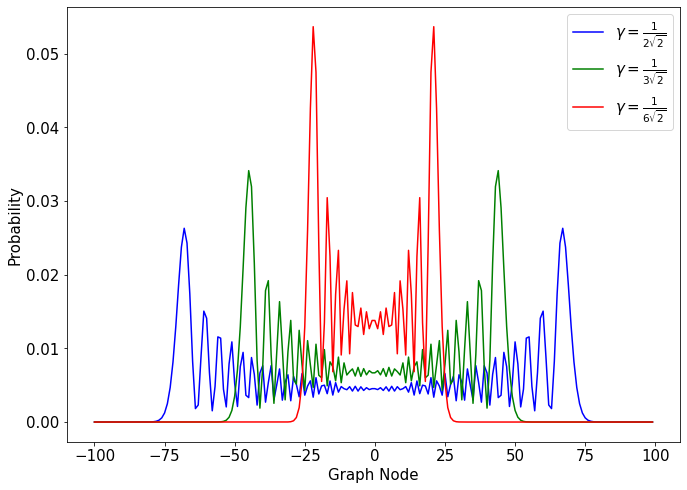

In [20]:
N = 200
t = 100
denom = 2
gamma = 1/(denom*np.sqrt(2))
initCond = 'sup'
initState = init_state(N,initCond)


denom1=2
denom2=3
denom3=6
gamma1 = 1/(denom1*np.sqrt(2)) 
gamma2 = 1/(denom2*np.sqrt(2)) 
gamma3 = 1/(denom3*np.sqrt(2)) 

lg = Graph({})
lg = lg.linegraph(N) 

qwg1 = ctqwalk(lg,N,t,gamma1,initState)
qwg2 = ctqwalk(lg,N,t,gamma2,initState)
qwg3 = ctqwalk(lg,N,t,gamma3,initState)
plotmultqw(N,qwg1,qwg2,qwg3,denom1,denom2,denom3,'Gamma','Gamma')

<ipython-input-19-942483769dbc>:21: ComplexWarning: Casting complex values to real discards the imaginary part
  probs[x]=psiN[x]*conjugate(psiN[x]) #duvida aqui


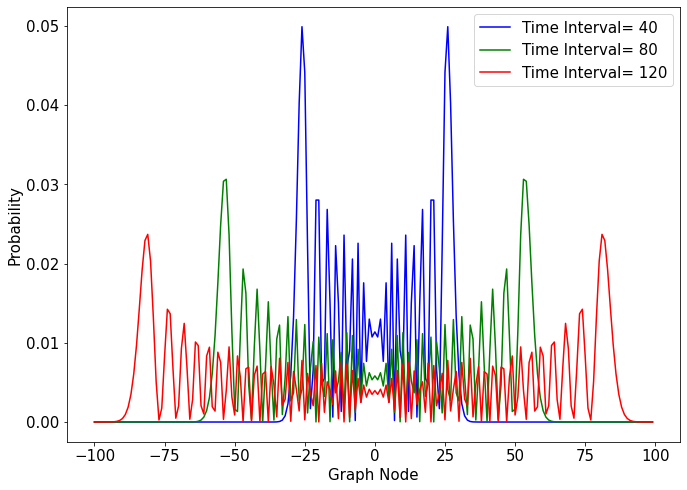

In [22]:
N = 200
t = 100
denom = 2
gamma = 1/(denom*np.sqrt(2))
initCond = '0'
initState = init_state(N,initCond)


t1 = 40
t2 = 80
t3 = 120

lg = Graph({})
lg = lg.linegraph(N) 


qwt1=ctqwalk(lg,N,t1,gamma,initState)
qwt2=ctqwalk(lg,N,t2,gamma,initState)
qwt3=ctqwalk(lg,N,t3,gamma,initState)
plotmultqw(N,qwt1,qwt2,qwt3,t1,t2,t3,'Time','Time')